In [1]:
# Import pandas and numpy
import pandas as pd
import numpy as np

# Import the mean_squared_error
from sklearn.metrics import mean_squared_error

# Import train_test_split
from sklearn.model_selection import train_test_split

# Import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_census = pd.read_csv('census_cleaned.csv')
df_census.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Split data into X and y
X = df_census.iloc[:,:-1]
y = df_census.iloc[:,-1]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [4]:
# Import Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

# Import accuracy_score
from sklearn.metrics import accuracy_score

In [5]:
def classification_model(model):

    # Instantiate regression model
    clf = model

    # Fit model on training data
    clf.fit(X_train, y_train)

    # Make predictions for test data
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_pred, y_test)

    print('Accuracy:', accuracy)
    
    return clf

In [6]:
classification_model(DecisionTreeClassifier(random_state=2))

Accuracy: 0.8131679154894976


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=2, splitter='best')

In [7]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Define cross_val function with classifer and num_splits as input
def cross_val_clf(classifier, num_splits=5):
    
    # Instantiate the classifier
    model = classifier

    # Obtain scores of cross-validation
    scores = cross_val_score(model, X, y, cv=num_splits)

    # Display accuracy
    print('Accuracy:', np.round(scores, 2))

    # Display mean accuracy
    print('Accuracy mean: %0.3f' % (scores.mean()))

In [8]:
cross_val_clf(DecisionTreeClassifier(random_state=2))

Accuracy: [0.81 0.81 0.81 0.82 0.82]
Accuracy mean: 0.813


In [9]:
clf = classification_model(DecisionTreeClassifier(max_depth=2, random_state=2))

Accuracy: 0.8206608524751259


In [10]:
def visualize_tree(model, name_of_file):
    
    # Import libraries for function
    import collections
    import pydotplus
    from sklearn.tree import export_graphviz
    from sklearn import tree
    from IPython.display import Image

    # Visualize data as dot_data
    dot_data = tree.export_graphviz(model,feature_names=X_train.columns, class_names=['0', '1'], 
                                    out_file=None, filled=True, rounded=True)
    # Initialize graph of tree
    graph = pydotplus.graph_from_dot_data(dot_data)

    # Decide colors
    colors = ('LimeGreen', 'Orange')
    
    # Initialize edges as dictionary
    edges = collections.defaultdict(list)
    
    # Define edges
    for edge in graph.get_edge_list():
        edges[edge.get_source()].append(int(edge.get_destination()))

    # Connect edges to graph and color nodes
    for edge in edges:
        edges[edge].sort()    
        for i in range(2):
            dest = graph.get_node(str(edges[edge][i]))[0]
            dest.set_fillcolor(colors[i])
     
    # Name file as png
    name_of_file = str(name_of_file) + '.png'            
     
    # Save file    
    graph.write_png(name_of_file)
    
    # Return image
    return Image(filename=name_of_file)

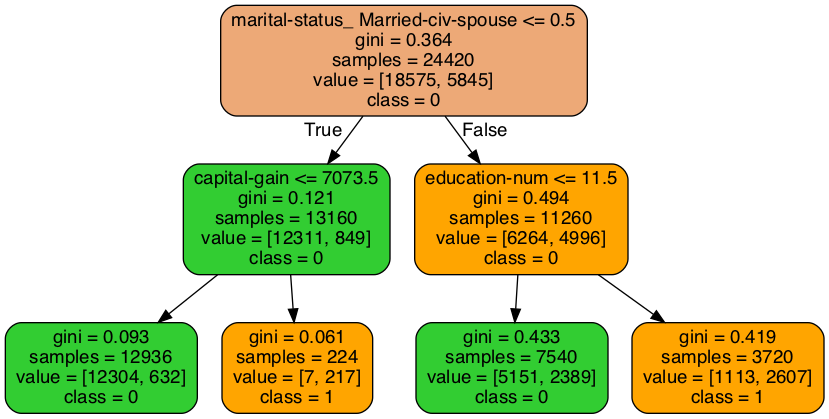

In [11]:
visualize_tree(clf, 'census_tree')

In [12]:
# Import
import matplotlib.pyplot as plt

In [13]:
# Copy Census DataFrame
df = df_census.copy()

# Normalize dataFrame
normalized_df=(df-df.min())/(df.max()-df.min())

# Show first five rows
normalized_df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ >50K
0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.452055,0.048238,0.800000,0.00000,0.0,0.122449,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.287671,0.138113,0.533333,0.00000,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.493151,0.151068,0.400000,0.00000,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.150685,0.221488,0.800000,0.00000,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
'''
Plots boundary of machine learning model with dataFrame, 2 column names, model, 
and title of plot as input. Function trains model
'''

def boundary_machine_learning_model(df, col_1, col_2, target_col, model, title):
    
    # Select 2 columns only
    X_trim = df[[col_1, col_2]].to_numpy()
    
    # Instantiate classifier
    clf = model

    # Train model
    clf.fit(X_trim, target_col)

    # Plot decision regions
    x_min, x_max = X_trim[:, 0].min() - 1, X_trim[:, 0].max() + 1
    y_min, y_max = X_trim[:, 1].min() - 1, X_trim[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    # Generate boundaries
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Increase plot size
    plt.figure(figsize=(12,8))
    
    # Show plots
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X_trim[:, 0], X_trim[:, 1], c=y,s=20, edgecolor='k')

    # Add title
    plt.title(title)
    
    # Add x, y labels
    plt.xlabel(col_1)
    plt.ylabel(col_2)
    
    # Set x and y range
    plt.ylim(-0.2,1.2)
    plt.xlim(-0.2, 1.2)

    # Show graph
plt.show()

In [15]:
'''
Plots boundary of machine learning model with dataFrame, 2 column names, model, 
and title of plot as input. Function trains model
'''

from mlxtend.plotting import plot_decision_regions

def boundary_machine_learning_model(df, col_1, col_2, target_col, model, title):
    
    # Select 2 columns only
    X_trim = df[[col_1, col_2]].to_numpy()
    
    # Instantiate classifier
    clf = model

    # Train model
    clf.fit(X_trim, target_col)
    
    # Increase plot size
    plt.figure(figsize=(14,9))

    # Plotting decision regions
    plot_decision_regions(X_trim, y.to_numpy(), clf=clf, legend=2)
 
    # Add labels: x,y,title
    plt.xlabel(col_1)
    plt.ylabel(col_2)
    plt.title(title, fontsize=15)
    
    # Set x and y range
    plt.ylim(-0.1,1.1)
    plt.xlim(-0.1, 1.1)

    # Show graph
    plt.show()

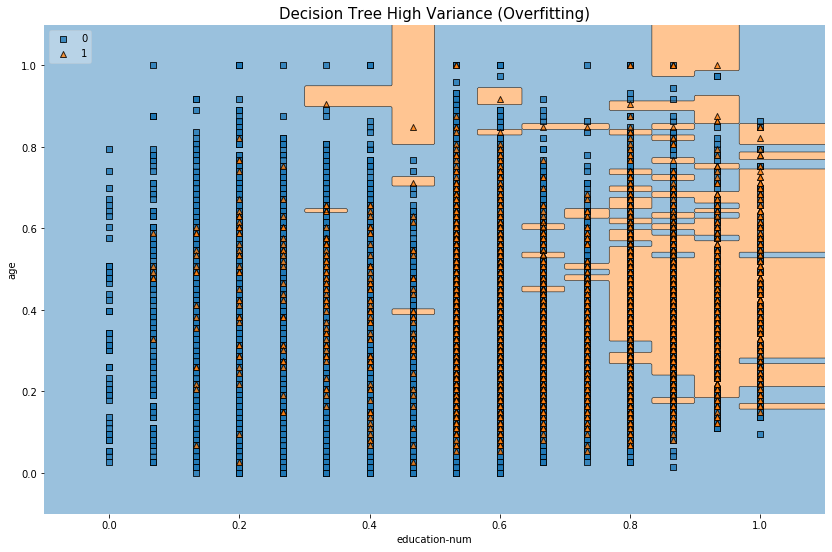

In [16]:
boundary_machine_learning_model(normalized_df, 'education-num', 'age', y, 
                                DecisionTreeClassifier(random_state=2), 'Decision Tree High Variance (Overfitting)')

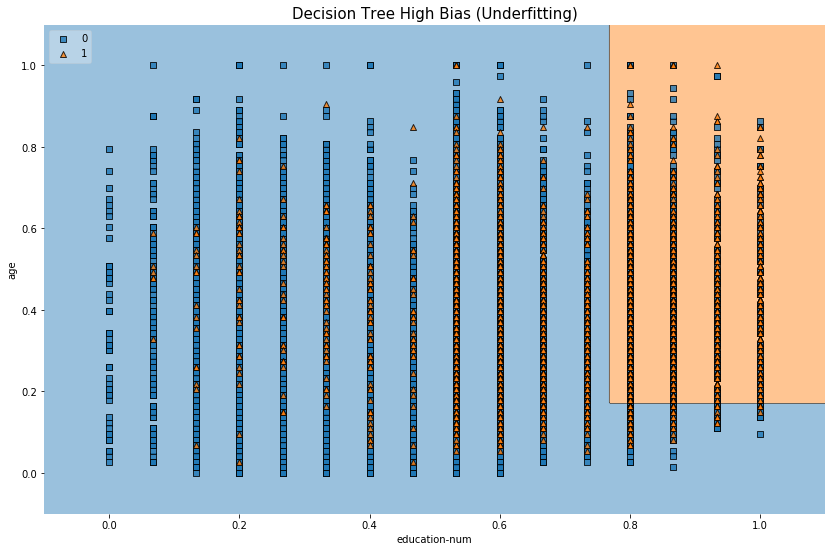

In [17]:
boundary_machine_learning_model(normalized_df, 'education-num', 'age', y, 
                                DecisionTreeClassifier(max_depth=2, random_state=2), 
                                'Decision Tree High Bias (Underfitting)')

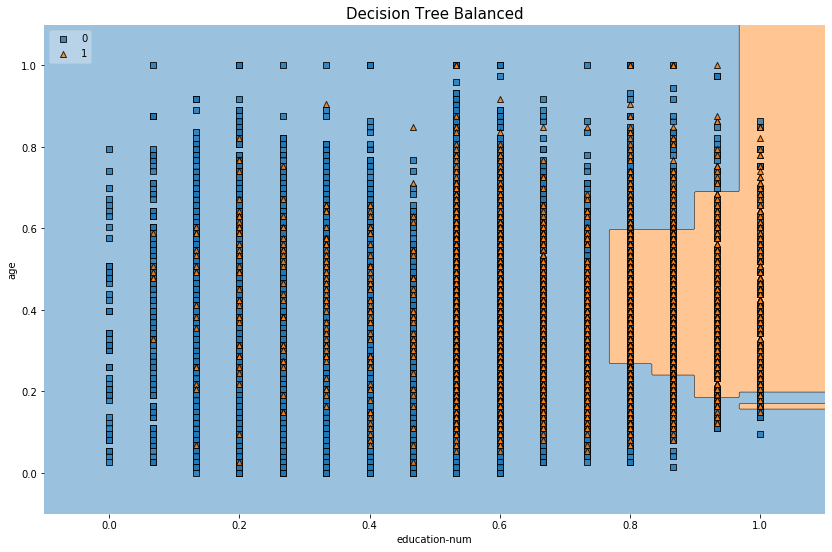

In [18]:
boundary_machine_learning_model(normalized_df, 'education-num', 'age', y, 
                                DecisionTreeClassifier(max_depth=6, random_state=2), 'Decision Tree Balanced')

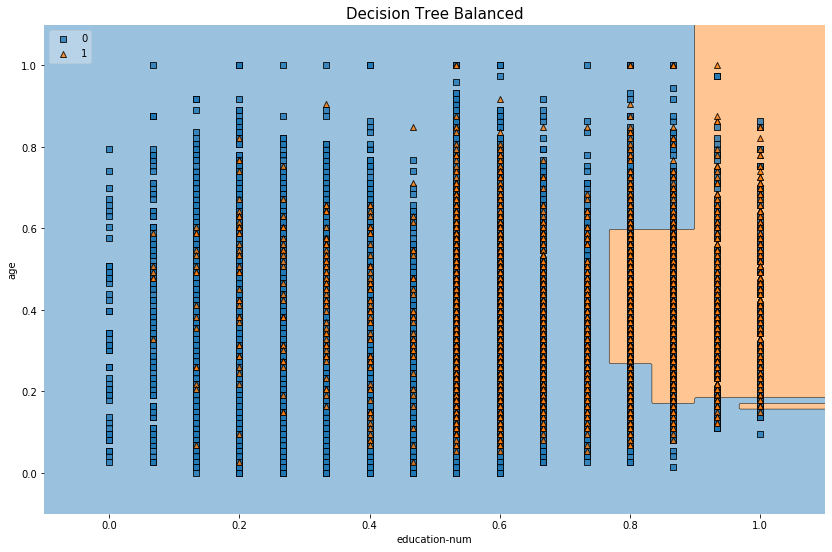

In [19]:
boundary_machine_learning_model(normalized_df, 'education-num', 'age', y, 
                                DecisionTreeClassifier(max_depth=5), 'Decision Tree Balanced')

In [20]:
import random
random.seed(2)

x_val = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
y_val = np.array([np.random.randint(1,10) for i in range(9)])
        
import seaborn as sns
sns.set()
import statsmodels.api as sm

In [21]:
def ols_poly(x, y, degree):
    poly_list = np.array([x**i for i in range(1,degree + 1)])
    X = np.column_stack(poly_list)
    X = sm.add_constant(X)
    model = sm.OLS(y, X)
    est = model.fit()
    
    x_pred = np.linspace(0,10,1000)
    pred_list = np.array([x_pred**i for i in range(1,degree+1)])
    X_pred = np.column_stack(pred_list)
    X_pred2 = sm.add_constant(X_pred)
    y_pred = est.predict(X_pred2)
    
    return X_pred2, y_pred


# Define function that displays all attendance points
def poly_plot(x, y, title='', degree=1):

    fig, ax = plt.subplots(figsize=(10, 7))
    
    ax.scatter(x_val, y_val, alpha=0.5, s=150, c = 'steelblue')

    fig.suptitle(title, fontsize=15)

    fig.tight_layout(pad=2); 

    ax.grid(True)
    
    ax.set_xlim([0,10])
    ax.set_ylim([-1,11])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    
    x_pred, y_pred = ols_poly(x, y, degree)
                
    ax.plot(x_pred[:,1], y_pred, '-', color='orchid', linewidth=1.5, alpha=0.75)
        
    plt.show()
    
    fig.savefig(title, dpi=325)

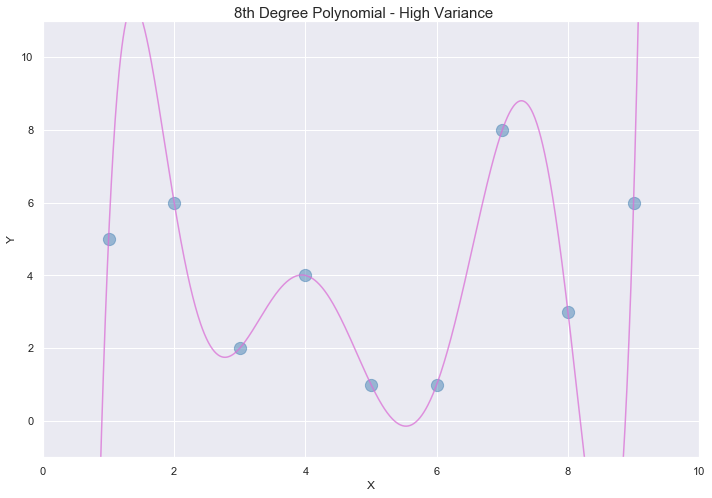

In [22]:
poly_plot(x_val, y_val, title='8th Degree Polynomial - High Variance', degree=8)

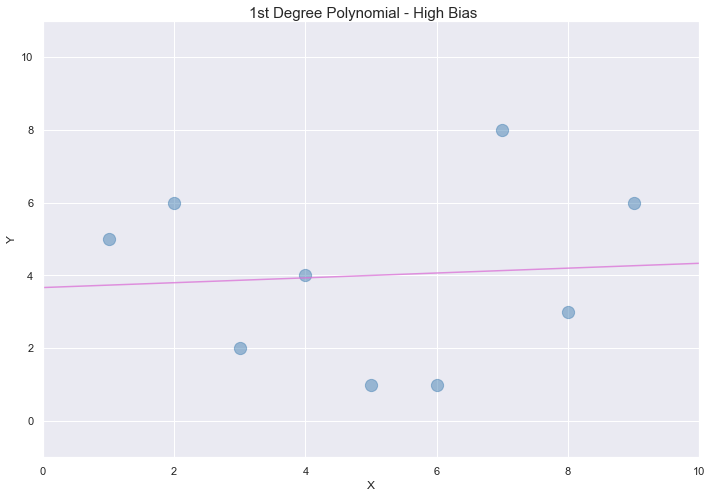

In [23]:
poly_plot(x_val, y_val, title='1st Degree Polynomial - High Bias', degree=1)

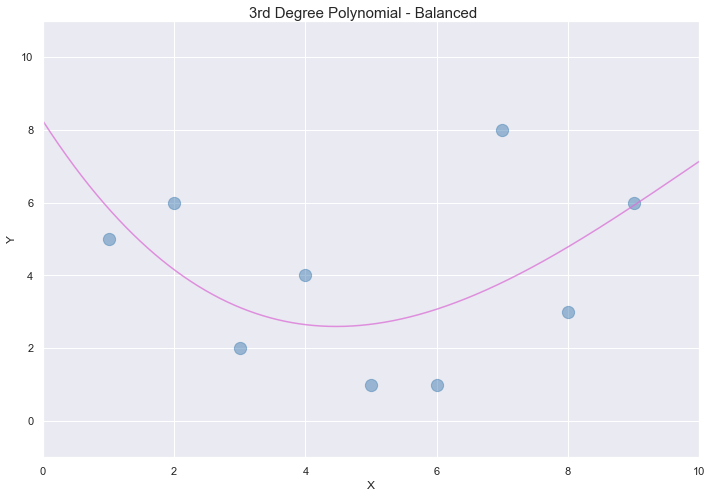

In [24]:
poly_plot(x_val, y_val, title='3rd Degree Polynomial - Balanced', degree=3)

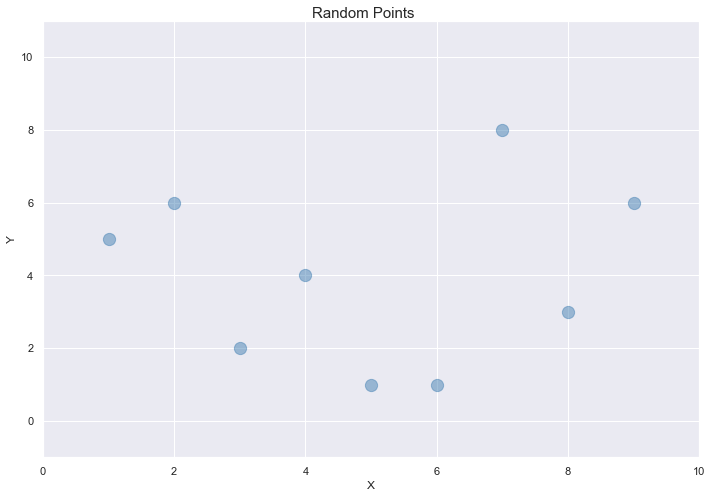

In [25]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.scatter(x_val, y_val, alpha=0.5, s=150, c = 'steelblue')

fig.suptitle('Random Points', fontsize=15)

fig.tight_layout(pad=2); 

ax.grid(True)

ax.set_xlim([0,10])
ax.set_ylim([-1,11])
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()

fig.savefig('Random_Points', dpi=325)

In [26]:
df_bikes = pd.read_csv('bike_rentals_cleaned.csv')
df_bikes.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1.0,0.0,1.0,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1.0,0.0,1.0,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1.0,0.0,1.0,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1.0,0.0,1.0,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1.0,0.0,1.0,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,1600


In [27]:
# split data into X and y
X = df_bikes.iloc[:,:-1]
y = df_bikes.iloc[:,-1]

# Import train_test_split
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [28]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Define cross_val function with classifer and num_splits as input
def cross_val_regressor(regressor, num_splits=5):
    
    # Instantiate the classifier
    model = regressor

    # Obtain scores of cross-validation using num_splits and mean squared error
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=num_splits)
    
    # Take square root of the scores
    rmse = np.sqrt(-scores)
    
    # Display mean score
    print('RMSE mean: %0.2f' % (rmse.mean()))
    
    # Return model
    return model

In [29]:
from sklearn.tree import DecisionTreeRegressor
cross_val_regressor(DecisionTreeRegressor(random_state=2))

RMSE mean: 1233.36


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=2, splitter='best')

In [30]:
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_train)
reg_mse = mean_squared_error(y_train, y_pred)
reg_rmse = np.sqrt(reg_mse)
reg_rmse

0.0

In [31]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Choose max_depth hyperparameters
params = {'max_depth':[None,2,3,4,6,8,10,20]}

# Instantiate regression model as reg
reg = DecisionTreeRegressor(random_state=2)

# Instantiate GridSearchCV as grid_reg
grid_reg = GridSearchCV(reg, params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit grid_reg on X_train and y_train
grid_reg.fit(X_train, y_train)

# Extract best parameters
best_params = grid_reg.best_params_

# Print best hyperparameters
print("Best params:", best_params)

Best params: {'max_depth': 6}


In [32]:
# Compute best score
best_score = np.sqrt(-grid_reg.best_score_)

# Print best score
print("Training score: {:.3f}".format(best_score))

Training score: 951.173


In [33]:
# Extract best model
best_model = grid_reg.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

# Import mean_squared_error from sklearn.metrics as MSE 
from sklearn.metrics import mean_squared_error as MSE

# Compute rmse_test
rmse_test = MSE(y_test, y_pred)**0.5

# Print rmse_test
print('Test score: {:.3f}'.format(rmse_test))

Test score: 864.670


In [34]:
def grid_search(params, reg=DecisionTreeRegressor(random_state=2)):

    # Instantiate GridSearchCV as grid_reg
    grid_reg = GridSearchCV(reg, params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
    
    # Fit grid_reg on X_train and y_train
    grid_reg.fit(X_train, y_train)

    # Import mean_squared_error from sklearn.metrics as MSE 
    from sklearn.metrics import mean_squared_error as MSE_

    # Extract best params
    best_params = grid_reg.best_params_

    # Print best params
    print("Best params:", best_params)
    
    # Compute best score
    best_score = np.sqrt(-grid_reg.best_score_)

    # Print best score
    print("Training score: {:.3f}".format(best_score))

    # Predict test set labels
    y_pred = grid_reg.predict(X_test)

    # Compute rmse_test
    rmse_test = MSE(y_test, y_pred)**0.5

    # Print rmse_test
    print('Test score: {:.3f}'.format(rmse_test))

In [35]:
X_train.shape

(548, 12)

In [36]:
grid_search(params={'min_samples_leaf':[1,2,4,6,8,10,20,30]})

Best params: {'min_samples_leaf': 8}
Training score: 895.859
Test score: 855.620


In [37]:
grid_search(params={'max_depth':[None,2,3,4,6,8,10,20],'min_samples_leaf':[1,2,4,6,8,10,20,30]})

Best params: {'max_depth': 6, 'min_samples_leaf': 2}
Training score: 870.381
Test score: 913.000


In [38]:
grid_search(params={'max_depth':[5,6,7,8,9],'min_samples_leaf':[3,5,7,9]})

Best params: {'max_depth': 9, 'min_samples_leaf': 7}
Training score: 888.787
Test score: 878.538


In [39]:
grid_search(params={'max_leaf_nodes':[10, 15, 20, 25, 30, 40, 50, None]})

Best params: {'max_leaf_nodes': 30}
Training score: 958.650
Test score: 875.727


In [40]:
from sklearn.model_selection import RandomizedSearchCV

In [41]:
def randomized_search(params, runs=16, reg=DecisionTreeRegressor(random_state=2)):

    # Instantiate GridSearchCV as grid_reg
    rand_reg = RandomizedSearchCV(reg, params, n_iter=runs, scoring='neg_mean_squared_error', 
                                  cv=5, n_jobs=-1, random_state=2)
    
    # Fit grid_reg on X_train and y_train
    rand_reg.fit(X_train, y_train)

    # Extract best estimator
    best_model = rand_reg.best_estimator_

    # Extract best params
    best_params = rand_reg.best_params_

    # Print best params
    print("Best params:", best_params)
    
    # Compute best score
    best_score = np.sqrt(-rand_reg.best_score_)

    # Print best score
    print("Training score: {:.3f}".format(best_score))

    # Predict test set labels
    y_pred = best_model.predict(X_test)
    
    # Import mean_squared_error from sklearn.metrics as MSE 
    from sklearn.metrics import mean_squared_error as MSE

    # Compute rmse_test
    rmse_test = MSE(y_test, y_pred)**0.5

    # Print rmse_test
    print('Test set score: {:.3f}'.format(rmse_test))

In [42]:
randomized_search(params={'max_depth':[None,2,3,4,6,8,10,20],
                          'min_samples_leaf':[1,2,4,6,8,10,20,30],
                         'max_leaf_nodes':[10, 15, 20, 25, 30, 40, 50, None]})

Best params: {'min_samples_leaf': 10, 'max_leaf_nodes': None, 'max_depth': 6}
Training score: 921.879
Test set score: 816.487


In [43]:
grid_search(params={'max_features':['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70, 'sqrt', 'log2']})

Best params: {'max_features': 0.9}
Training score: 945.276
Test score: 882.358


In [44]:
randomized_search(params={'max_depth':[None,2,3,4,6,8,10,20],
                          'min_samples_leaf':[1,2,4,6,8,10,20,30],
                         'max_leaf_nodes':[10, 15, 20, 25, 30, 40, 50, None], 
                         'max_features':['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70, 'sqrt', 'log2']})

Best params: {'min_samples_leaf': 2, 'max_leaf_nodes': 50, 'max_features': 0.7, 'max_depth': None}
Training score: 866.435
Test set score: 822.210


In [45]:
grid_search(params={'min_samples_split':[2, 4, 6, 8, 10, 12, 15, 20]})

Best params: {'min_samples_split': 20}
Training score: 931.333
Test score: 909.896


In [46]:
X_train.shape

(548, 12)

In [47]:
grid_search(params={'min_samples_split':[2, 0.01, 0.02, 0.03, 0.04, 0.06, 0.08, 0.1]})

Best params: {'min_samples_split': 0.02}
Training score: 929.557
Test score: 902.071


In [48]:
grid_search(params={'splitter':['random', 'best']})

Best params: {'splitter': 'best'}
Training score: 975.230
Test score: 944.806


In [49]:
grid_search(params={'criterion':['mse', 'friedman_mse', 'mae']})

Best params: {'criterion': 'mae'}
Training score: 946.797
Test score: 973.928


In [50]:
grid_search(params={'criterion':['mse', 'friedman_mse']})

Best params: {'criterion': 'mse'}
Training score: 975.230
Test score: 944.806


In [51]:
# Extra
grid_search(params={'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10, 0.15, 0.2]})

Best params: {'min_impurity_decrease': 0.15}
Training score: 973.514
Test score: 936.658


In [52]:
# Extra
grid_search(params={'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]})

Best params: {'min_weight_fraction_leaf': 0.0075}
Training score: 896.537
Test score: 860.768


In [53]:
randomized_search(params={'criterion':['mse'],
                          'splitter':['random', 'best'],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05],
                          'min_samples_split':[2, 0.01, 0.02, 0.03, 0.04, 0.06, 0.08, 0.1],
                          'min_samples_leaf':[1,2,4,6,8,10,20,30],
                          'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
                          'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
                          'max_features':['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
                          'max_depth':[None,2,3,4,6,8,10,20]
                         },
                 runs=50)

Best params: {'splitter': 'random', 'min_weight_fraction_leaf': 0.005, 'min_samples_split': 0.03, 'min_samples_leaf': 2, 'min_impurity_decrease': 0.2, 'max_leaf_nodes': None, 'max_features': 0.8, 'max_depth': 6, 'criterion': 'mse'}
Training score: 840.981
Test set score: 790.111


# Case Study - Heart Disease

In [54]:
# Upload heart.csv to dataFrame
df_heart = pd.read_csv('heart_disease.csv')

# Show first five rows
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [55]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [56]:
# split data into X and y
X = df_heart.iloc[:,:-1]
y = df_heart.iloc[:,-1]

# Import train_test_split
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(random_state=2)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy_score(y_pred, y_test)

0.8552631578947368

In [58]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Define cross_val function with classifer and num_splits as input
def cross_val_clf(classifier, num_splits=5):
    
    # Instantiate the classifier
    model = classifier

    # Obtain scores of cross-validation
    scores = cross_val_score(model, X, y, cv=num_splits)

    # Display accuracy
    print('Accuracy:', np.round(scores, 2))

    # Display mean accuracy
    print('Accuracy mean: %0.2f' % (scores.mean()))

In [59]:
cross_val_clf(DecisionTreeClassifier(random_state=2))

Accuracy: [0.74 0.85 0.77 0.73 0.7 ]
Accuracy mean: 0.76


In [60]:
def randomized_search_clf(params, runs=20, clf=DecisionTreeClassifier(random_state=2)):

    # Instantiate GridSearchCV as grid_reg
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, 
                                  cv=5, n_jobs=-1, random_state=2)
    
    # Fit grid_reg on X_train and y_train
    rand_clf.fit(X_train, y_train)

    # Extract best estimator
    best_model = rand_clf.best_estimator_
    
    # Extract best score
    best_score = rand_clf.best_score_

    # Print best score
    print("Training score: {:.3f}".format(best_score))

    # Predict test set labels
    y_pred = best_model.predict(X_test)

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Print accuracy
    print('Test score: {:.3f}'.format(accuracy))
        
    # Return best model
    return best_model

In [61]:
randomized_search_clf(params={'criterion':['entropy', 'gini'],
                              'splitter':['random', 'best'],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01],
                          'min_samples_split':[2, 3, 4, 5, 6, 8, 10],
                          'min_samples_leaf':[1, 0.01, 0.02, 0.03, 0.04],
                          'min_impurity_decrease':[0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
                          'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
                          'max_features':['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
                          'max_depth':[None, 2,4,6,8],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]
                         })

Training score: 0.797
Test score: 0.855


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
                       max_features=0.8, max_leaf_nodes=45,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.04, min_samples_split=10,
                       min_weight_fraction_leaf=0.05, presort=False,
                       random_state=2, splitter='best')

In [62]:
cross_val_clf(DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
                       max_features=0.8, max_leaf_nodes=45,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.04, min_samples_split=10,
                       min_weight_fraction_leaf=0.05, presort=False,
                       random_state=2, splitter='best'))

Accuracy: [0.8  0.89 0.8  0.77 0.77]
Accuracy mean: 0.81


In [63]:
randomized_search_clf(params={'max_depth':[None, 6, 7],
'max_features':['auto', 0.78],
'max_leaf_nodes':[45, None],
'min_samples_leaf':[1, 0.035, 0.04, 0.045, 0.05],
'min_samples_split':[2, 9, 10],
'min_weight_fraction_leaf': [0.0, 0.05, 0.06, 0.07],
},
runs=100)

Training score: 0.802
Test score: 0.868


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=0.78, max_leaf_nodes=45,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.045, min_samples_split=9,
                       min_weight_fraction_leaf=0.06, presort=False,
                       random_state=2, splitter='best')

In [64]:
cross_val_clf(DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=0.78, max_leaf_nodes=45,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.045, min_samples_split=9,
                       min_weight_fraction_leaf=0.06, presort=False,
                       random_state=2, splitter='best'))

Accuracy: [0.82 0.9  0.8  0.8  0.78]
Accuracy mean: 0.82


In [65]:
randomized_search_clf_cv(params={'criterion':['entropy'],
                                 'max_depth':[7],
                                 'max_features':['auto', 0.78],
                                 'max_leaf_nodes':[45],
                                 'min_samples_leaf':[0.045],
                                 'min_samples_split':[9],
                                 'min_weight_fraction_leaf': [0.06]
                         })

NameError: name 'randomized_search_clf_cv' is not defined

In [ ]:
randomized_search_clf(params={'criterion':['entropy', 'gini'],
                              'splitter':['random', 'best'],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075],
                          'min_samples_split':[2, 9, 10, 11],
                          'min_samples_leaf':[0.03, 0.04, 0.05],
                          'min_impurity_decrease':[0.0, 0.0005, 0.005],
                          'max_leaf_nodes':[40, 45, 50, None],
                          'max_features':['auto', 0.85, 0.80, 0.75],
                          'max_depth':[None, 7,8,9],
                          'min_weight_fraction_leaf':[0.0, 0.01, 0.05, 0.10]
                         }, runs=100)

In [ ]:
best_clf = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=0.78, max_leaf_nodes=45,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.045, min_samples_split=9,
                       min_weight_fraction_leaf=0.06, presort=False,
                       random_state=2, splitter='best')
best_clf.fit(X, y)

In [ ]:
best_clf.feature_importances_

In [ ]:
# Zip columns and feature_importances_ into dict
feature_dict = dict(zip(X.columns, best_clf.feature_importances_))

# Import operator
import operator

# Sort dict by values (as list of tuples)
sorted(feature_dict.items(), key=operator.itemgetter(1), reverse=True)